In [41]:
# Klustring med Scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [42]:
dataSitizenByRegion = pd.read_csv('Folkmängd.csv', delimiter = ';', usecols=['Region','2013','2016','2019'])

dataSitizenByRegion["2013-2016"] = dataSitizenByRegion["2016"] / dataSitizenByRegion["2013"]  #Skapar nytt relativt mått färändring
dataSitizenByRegion["2016-2019"] = dataSitizenByRegion["2019"] / dataSitizenByRegion["2016"]
dataSitizenByRegion["Region kod"] = dataSitizenByRegion['Region'].str[:4]      #Tar ut endast koden för respektive kommun

print(dataSitizenByRegion.head())

print(dataSitizenByRegion.shape)


                Region   2013   2016   2019  2013-2016  2016-2019 Region kod
0  0114 Upplands Väsby  41449  43891  46786   1.058916   1.065959       0114
1      0115 Vallentuna  31616  32785  34090   1.036975   1.039805       0115
2       0117 Österåker  40495  43293  45574   1.069095   1.052688       0117
3          0120 Värmdö  39784  42000  45000   1.055701   1.071429       0120
4        0123 Järfälla  69167  74412  79990   1.075831   1.074961       0123
(290, 7)


In [43]:
    
n_samples = 290
n_features = 3
n_clusters = 4

# Features (X) - inte först raden med rubriker bara de tre sista kolumnerna 
Xstg = dataSitizenByRegion.loc[0:, ['2016', '2013-2016', '2016-2019' ]].values  # .values turns it into a NumPy array
#print(Xstg)



In [44]:
xInstans =  dataSitizenByRegion.iloc[:, 0].values 
scaler = StandardScaler()
X = scaler.fit_transform(Xstg)

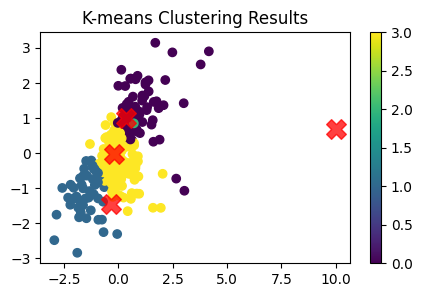

In [45]:
# Implementera K-means klustring
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X, y=xInstans)

# Visualisera resultaten
plt.figure(figsize=(5, 3))
scatter = plt.scatter(X[:, 1], X[:, 2], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering Results')
plt.colorbar(scatter)
plt.show()

#X[kmeans.labels_==0] #Skriv ut alla med label 0
#kmeans.labels_[:]   #Skriv ut alla labels

In [46]:
# Hämta och lägg till klusterlabel på resp Region
# Skriv ut till csv-fil

labels = kmeans.labels_            # Cluster labels for each data point
centroids = kmeans.cluster_centers_ # Coordinates of the cluster centroids
inertia = kmeans.inertia_          # Sum of squared distances from points to centroids

LabelStg = dataSitizenByRegion.iloc[0:, :].values
dataSitizenByRegionLabeled = np.insert(LabelStg, 0, labels, axis=1) # Lägg till klusterlabel på resp Region

# Show the DataFrame with cluster labels
print(dataSitizenByRegionLabeled)

dataprint = pd.DataFrame(dataSitizenByRegionLabeled)  
dataprint.to_csv('RegionClusteringLabeled_4.csv') 


[[0 '0114 Upplands Väsby' 41449 ... 1.0589157760138965 1.0659588526121528
  '0114']
 [0 '0115 Vallentuna' 31616 ... 1.0369749493927125 1.0398047887753545
  '0115']
 [0 '0117 Österåker' 40495 ... 1.0690949499938265 1.0526875014436514
  '0117']
 ...
 [1 '2582 Boden' 27838 ... 1.007328112651771 1.001355110191855 '2582']
 [1 '2583 Haparanda' 9886 ... 0.9977746307910176 0.981853203568532 '2583']
 [1 '2584 Kiruna' 23196 ... 0.998749784445594 0.9870505460353088 '2584']]


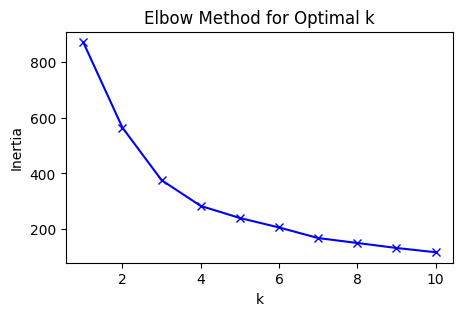

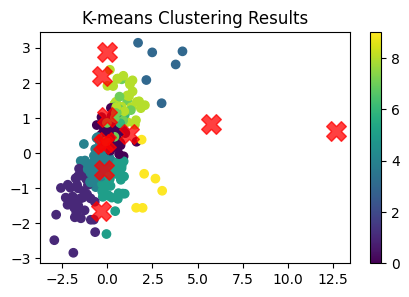

In [47]:
# Experimentera med olika antal kluster
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Visualisera resultaten
plt.figure(figsize=(5, 3))
scatter = plt.scatter(X[:, 1], X[:, 2], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering Results')
plt.colorbar(scatter)
plt.show()

#kmeans.labels_[:] #Skriv ut alla labels


In [48]:
# Hämta och lägg till klusterlabel på resp Region
# Skriv ut till csv-fil

labels = kmeans.labels_            # Cluster labels for each data point
centroids = kmeans.cluster_centers_ # Coordinates of the cluster centroids
inertia = kmeans.inertia_          # Sum of squared distances from points to centroids

LabelStg = dataSitizenByRegion.iloc[0:, :].values
dataSitizenByRegionLabeled = np.insert(LabelStg, 0, labels, axis=1) # Lägg till klusterlabel på resp Region

# Show the DataFrame with cluster labels
print(dataSitizenByRegionLabeled)

dataprint = pd.DataFrame(dataSitizenByRegionLabeled)  
dataprint.to_csv('RegionClusteringLabeled.csv') 


[[8 '0114 Upplands Väsby' 41449 ... 1.0589157760138965 1.0659588526121528
  '0114']
 [0 '0115 Vallentuna' 31616 ... 1.0369749493927125 1.0398047887753545
  '0115']
 [8 '0117 Österåker' 40495 ... 1.0690949499938265 1.0526875014436514
  '0117']
 ...
 [4 '2582 Boden' 27838 ... 1.007328112651771 1.001355110191855 '2582']
 [1 '2583 Haparanda' 9886 ... 0.9977746307910176 0.981853203568532 '2583']
 [1 '2584 Kiruna' 23196 ... 0.998749784445594 0.9870505460353088 '2584']]
